In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Cargamos el dataframe con los datos del .data
df_boston = pd.read_csv('/media/sf_MV_COMP/data/housing.data', delim_whitespace = True, header = None)
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df_boston.head()

/tmp/ipykernel_4691/288477330.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_boston = pd.read_csv('/media/sf_MV_COMP/data/housing.data', delim_whitespace = True, header = None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## BRIEF INTRODUCTION DECISION TREE

In [2]:
from sklearn.tree import DecisionTreeRegressor

x = df_boston[['LSTAT']].values
y = df_boston[['MEDV']].values

# Creamos el modelo e indicamos el nivel de profundidad que queremos que tenga, de forma que controlemos el ruido
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(x, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Text(0, 0.5, 'MEDV')

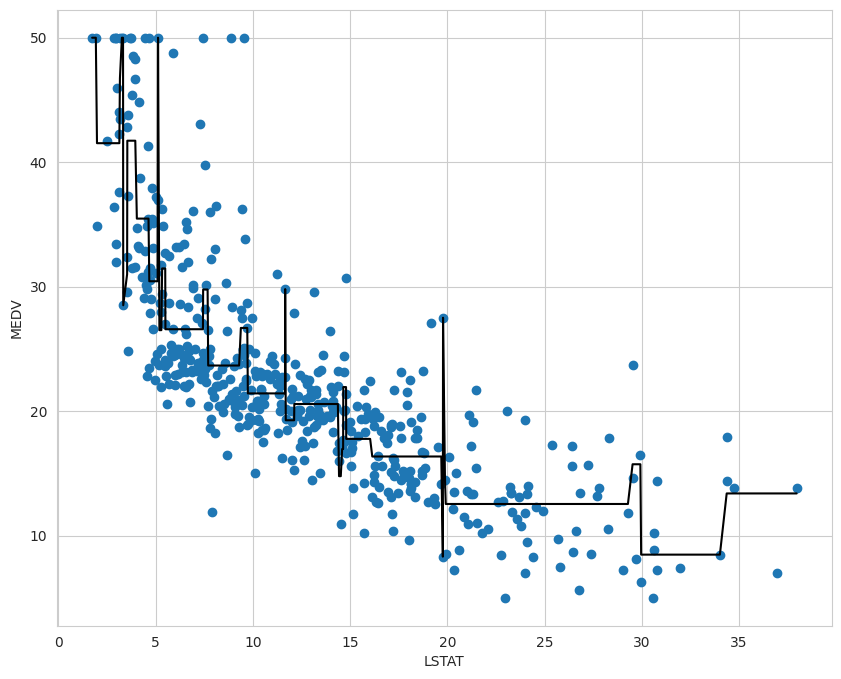

In [3]:
# Ordenamos x e y para que la linea de prediccion no salte de un lado a otro al dibujarse.
sort_idx = x.flatten().argsort()

plt.figure(figsize = (10, 8))
plt.scatter(x[sort_idx], y[sort_idx])
plt.plot(x[sort_idx], tree.predict(x[sort_idx]), color = 'k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

- Uso de ADABOOST para saber que variables son mas importantes en la determinacion del valor objetivo

In [4]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators = 500, random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(df_boston.drop(['MEDV'], axis=1), 
                                                    df_boston['MEDV'].values, test_size = 0.3, random_state = 42)

ada.fit(x_train, y_train)

,estimator,DecisionTreeR...r(max_depth=4)
,n_estimators,500
,learning_rate,1.0
,loss,'linear'
,random_state,42
,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [5]:
# Extraer el array de importancias (debe tener longitud 13)
importances = ada.feature_importances_
print("Shape de importances:", importances.shape)

Shape de importances: (13,)


In [6]:
# Construir DataFrame de importancias mapeando cada valor con la columna correspondiente de X
feat_imp = pd.DataFrame({
    'feature':    df_boston.drop(['MEDV'], axis=1).columns,   # Index con los 13 nombres de variable
    'importance': importances  # Array de 13 importancias
})

# Ordenar de mayor a menor y reiniciar índice
feat_imp = feat_imp.sort_values(
    by='importance',
    ascending=False
).reset_index(drop=True)

# Mostrar el resultado final
print(feat_imp)

    feature  importance
0     LSTAT    0.425447
1        RM    0.242193
2       DIS    0.130558
3   PTRATIO    0.040722
4       NOX    0.038972
5      CRIM    0.032842
6         B    0.024303
7       TAX    0.023489
8       RAD    0.015546
9     INDUS    0.011461
10      AGE    0.010580
11     CHAS    0.002092
12       ZN    0.001797
